# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
Dataset diperoleh melalui kaggle, berikut link menuju dataset :  
https://www.kaggle.com/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mhdfauzan","key":"8da0f4ca914eaf4a188f53e9c45bba27"}'}

In [3]:
# Buat folder untuk credential dan set permission
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset dari Kaggle
!kaggle datasets download -d rakeshkapilavai/extrovert-vs-introvert-behavior-data

!unzip extrovert-vs-introvert-behavior-data.zip

Dataset URL: https://www.kaggle.com/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data
License(s): CC-BY-SA-4.0
  0% 0.00/30.5k [00:00<?, ?B/s]
100% 30.5k/30.5k [00:00<00:00, 152MB/s]
Archive:  extrovert-vs-introvert-behavior-data.zip
  inflating: personality_datasert.csv  
  inflating: personality_dataset.csv  


In [4]:
df = pd.read_csv('/content/personality_datasert.csv')
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [5]:
test = pd.read_csv('/content/personality_dataset.csv')
test.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## INFO DATA
- Dilihat dari informasi kedua data, data dalam variabel df bersih dari missing value.
- Sedangkan, data dari variabel test terdapat beberapa missing value.

In [14]:
df.info()
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   S

In [7]:
test = test.duplicated().sum()
df = df.duplicated().sum()
print(df)
print(test)

402
388


## Deksripsi Variabel


In [15]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.441180,2.872608,2.221597,4.232340,2.893587
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.963354,3.000000,5.000000,3.000000
75%,7.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


## BAGI KOLOM NUM AND CAT
- Bagi kolom dengan tipe numerik dan categorical dalam variabel berbeda untuk memudahkan proses EDA.


In [6]:
cat =['Stage_fear', 'Drained_after_socializing']
target = ['Personality']
num = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']

## Univariate Analysis

**FITUR STAGE FEAR**

            count   persent
Stage_fear                 
No           1490  51.37931
Yes          1410  48.62069


<Axes: title={'center': 'Inilah jumlah Stage_fear lek 🕴️'}, xlabel='Stage_fear'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128372 (\N{MAN IN BUSINESS SUIT LEVITATING}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128372 (\N{MAN IN BUSINESS SUIT LEVITATING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


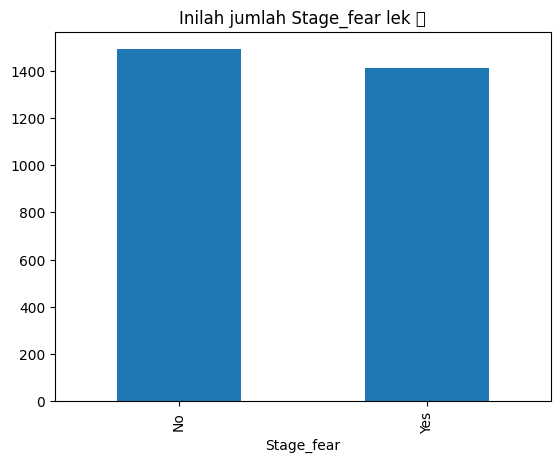

In [ ]:
feature = cat[0]
count = df[feature].value_counts()
persent = 100 * df[feature].value_counts(normalize=True)
count_persent = pd.DataFrame({'count': count, 'persent': persent})
print(count_persent)
count.plot(kind='bar', title=f"Inilah jumlah {feature} lek 🕴️")

**FITUR DRAINED AFTER SOCIALIZING**

                           count    persent
Drained_after_socializing                  
No                          1493  51.482759
Yes                         1407  48.517241


<Axes: title={'center': 'Inilah jumlah Drained_after_socializing lek'}, xlabel='Drained_after_socializing'>

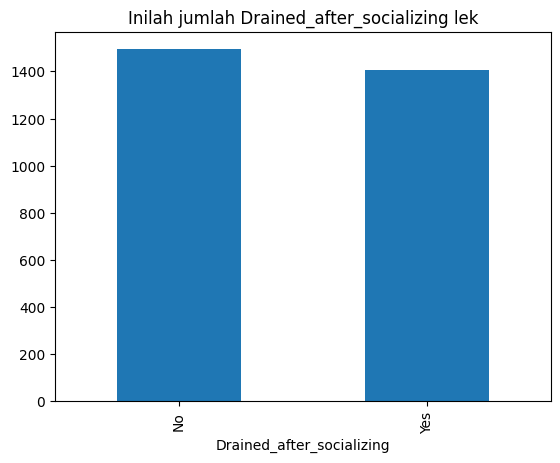

In [ ]:
fitur = cat[1]
count = df[fitur].value_counts()
persent = 100 * df[fitur].value_counts(normalize=True)
count_persent = pd.DataFrame({'count': count, 'persent': persent})
print(count_persent)
count.plot(kind='bar', title=f"Inilah jumlah {fitur} lek")

**FITUR PERSONALITY**

             count    persent
Personality                  
Extrovert     1491  51.413793
Introvert     1409  48.586207


<Axes: title={'center': 'Inilah jumlah Personality lek'}, xlabel='Personality'>

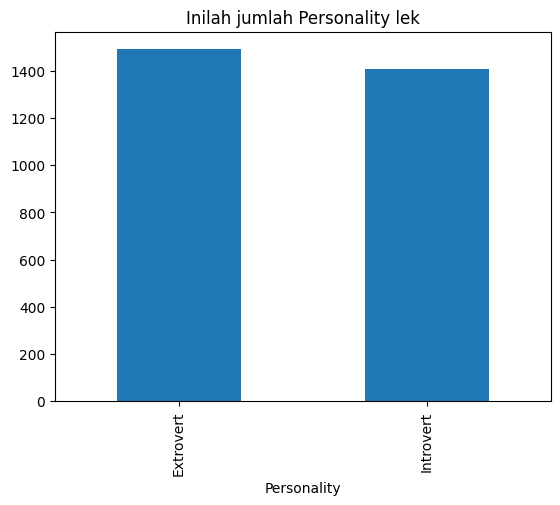

In [ ]:
fitur = cat[2]
count = df[fitur].value_counts()
persent = 100 * df[fitur].value_counts(normalize=True)
count_persent = pd.DataFrame({'count': count, 'persent': persent})
print(count_persent)
count.plot(kind='bar', title=f"Inilah jumlah {fitur} lek")

**DISTRIBUSI FITUR NUMERIK**

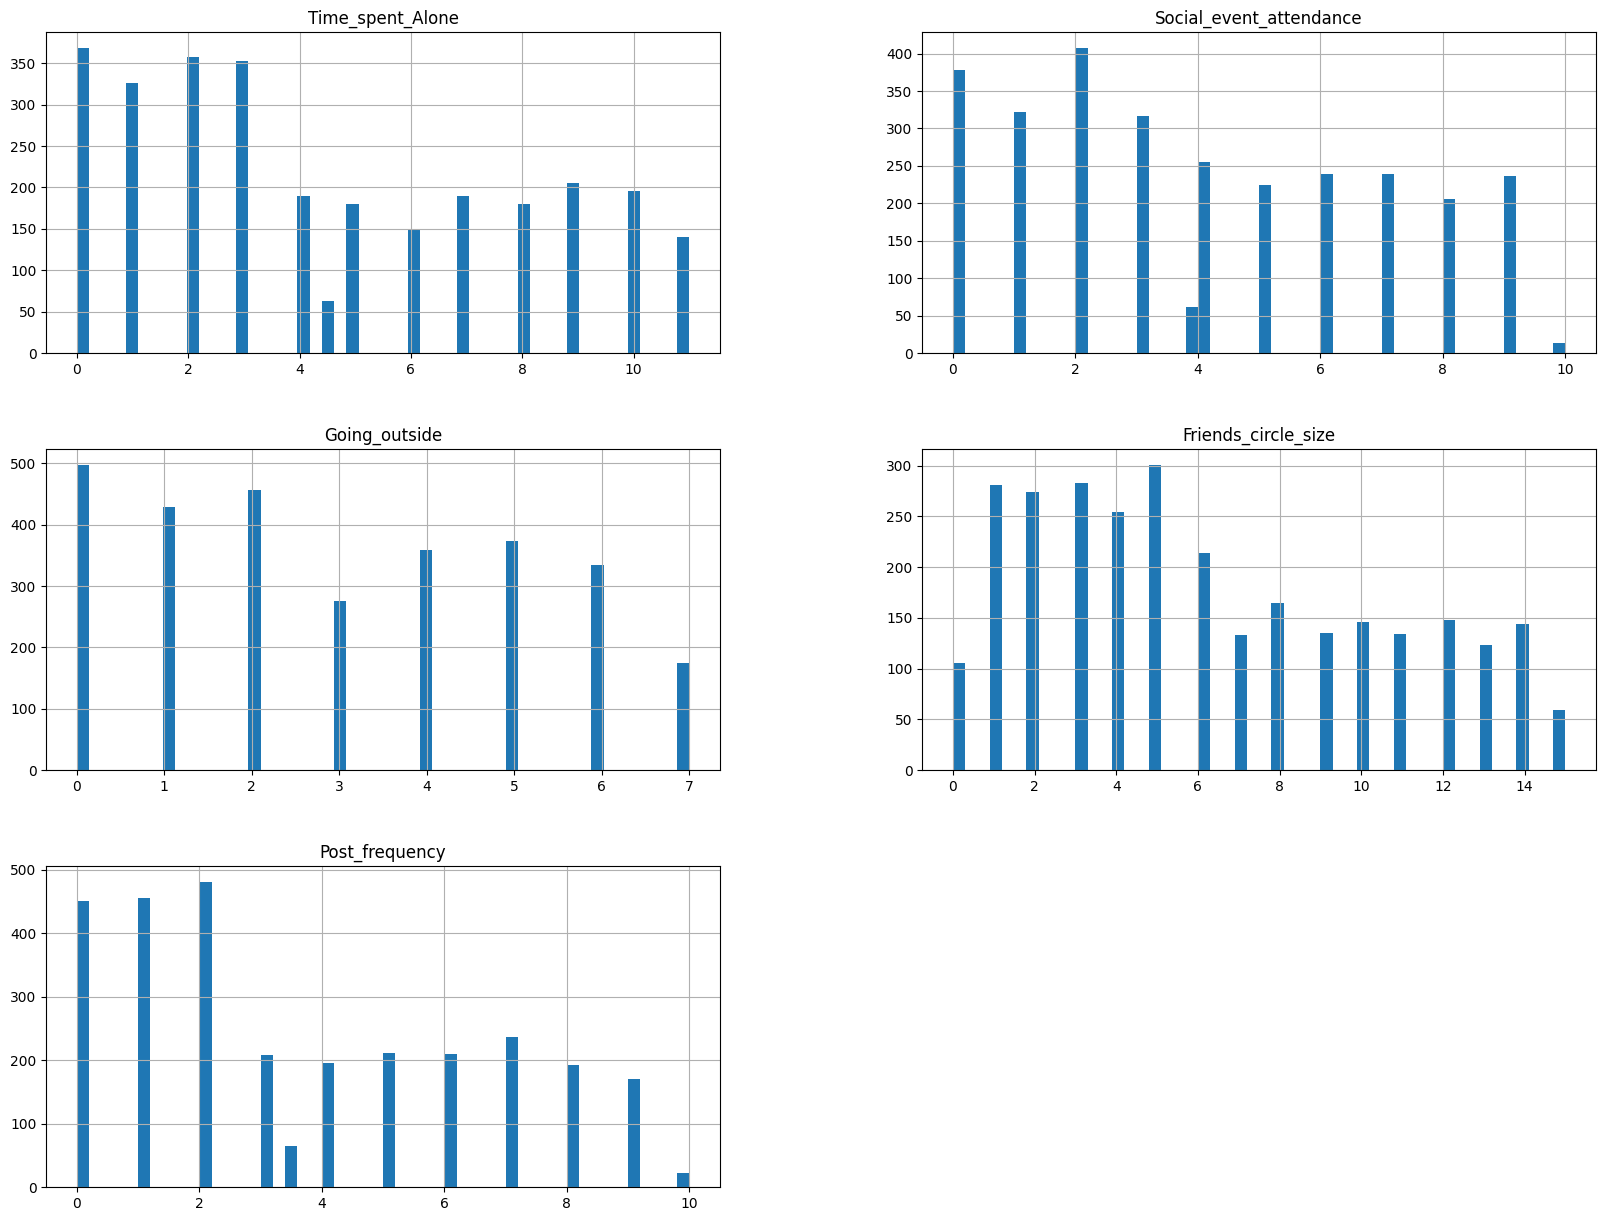

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

### Multivariate Analysis

/tmp/ipython-input-9-1992704476.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y='Personality', data=df, dodge=False, aspect = 3, palette="Set3", kind='bar')
/tmp/ipython-input-9-1992704476.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y='Personality', data=df, dodge=False, aspect = 3, palette="Set3", kind='bar')
/tmp/ipython-input-9-1992704476.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y='Personality', data=df, dodge=False, aspect = 3, palette="Set3", kind='bar')


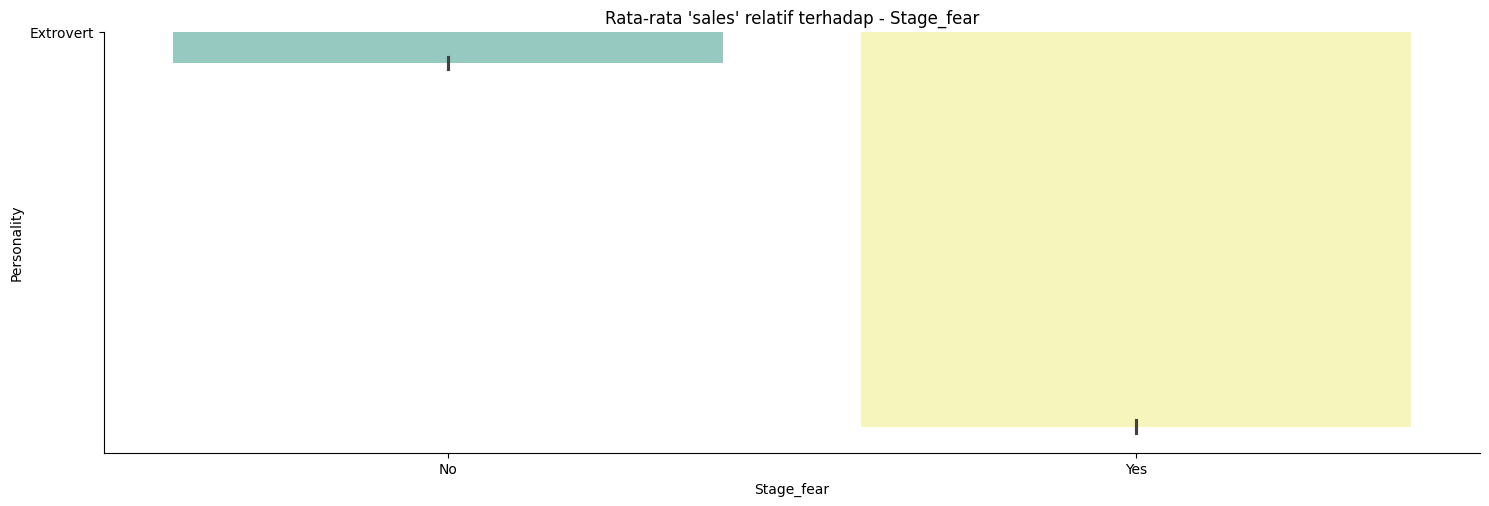

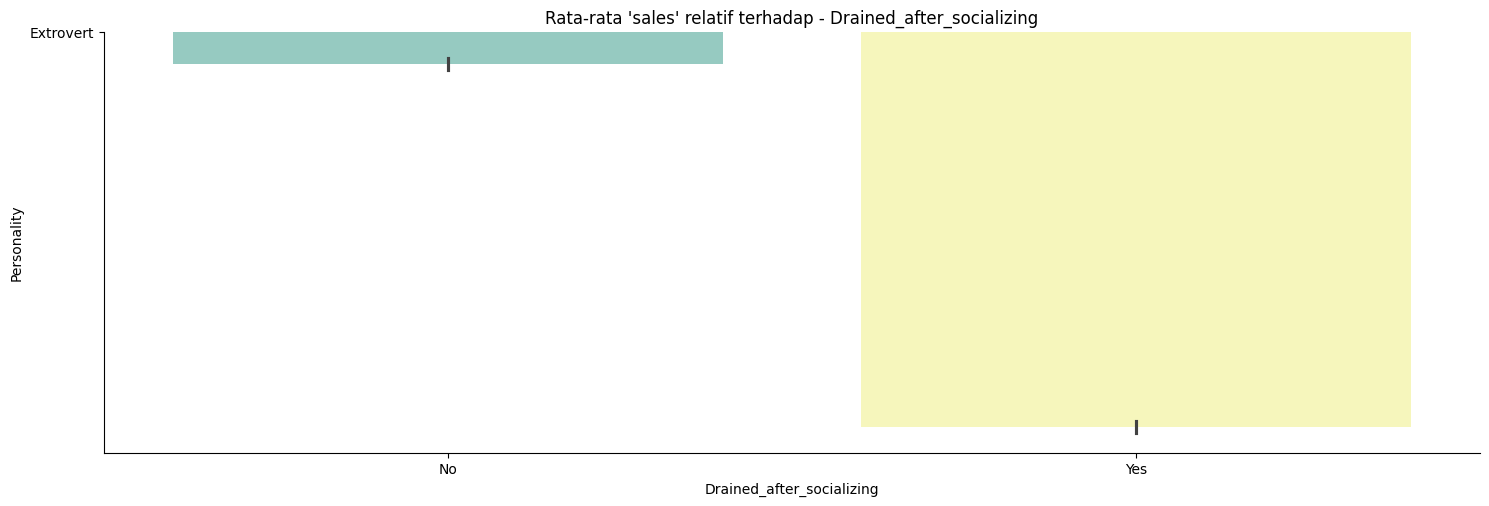

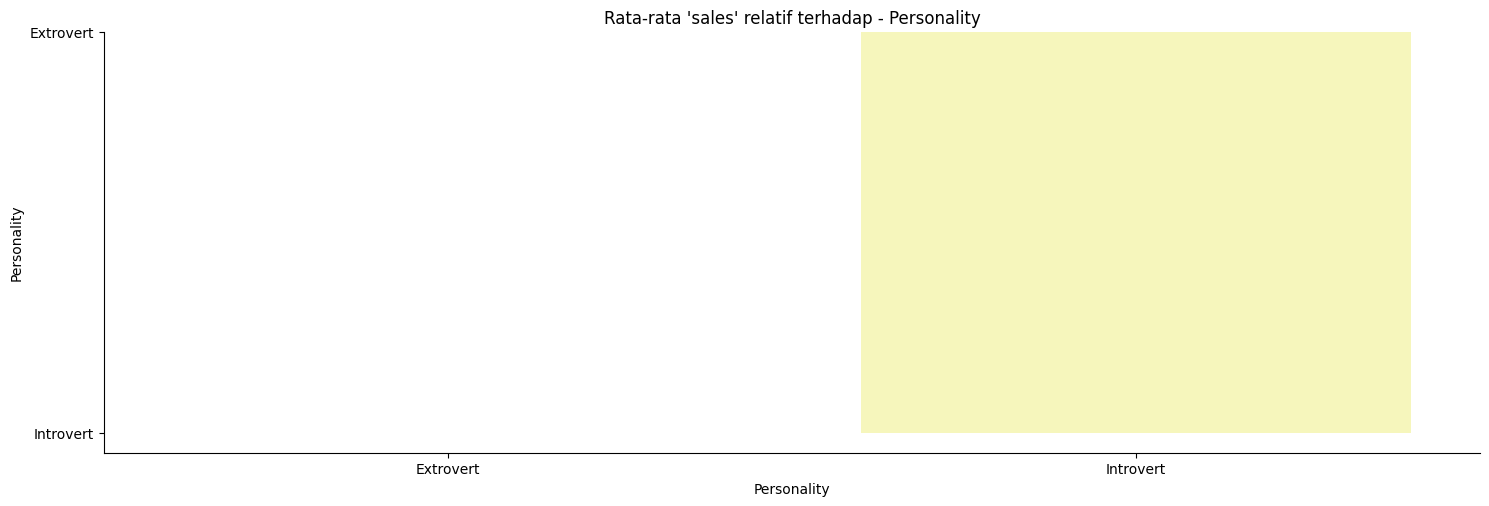

In [ ]:
categ = df.select_dtypes(include=['object']).columns.tolist()

for col in categ:
  sns.catplot(x=col, y='Personality', data=df, dodge=False, aspect = 3, palette="Set3", kind='bar')
  plt.title("Rata-rata 'sales' relatif terhadap - {}".format(col))

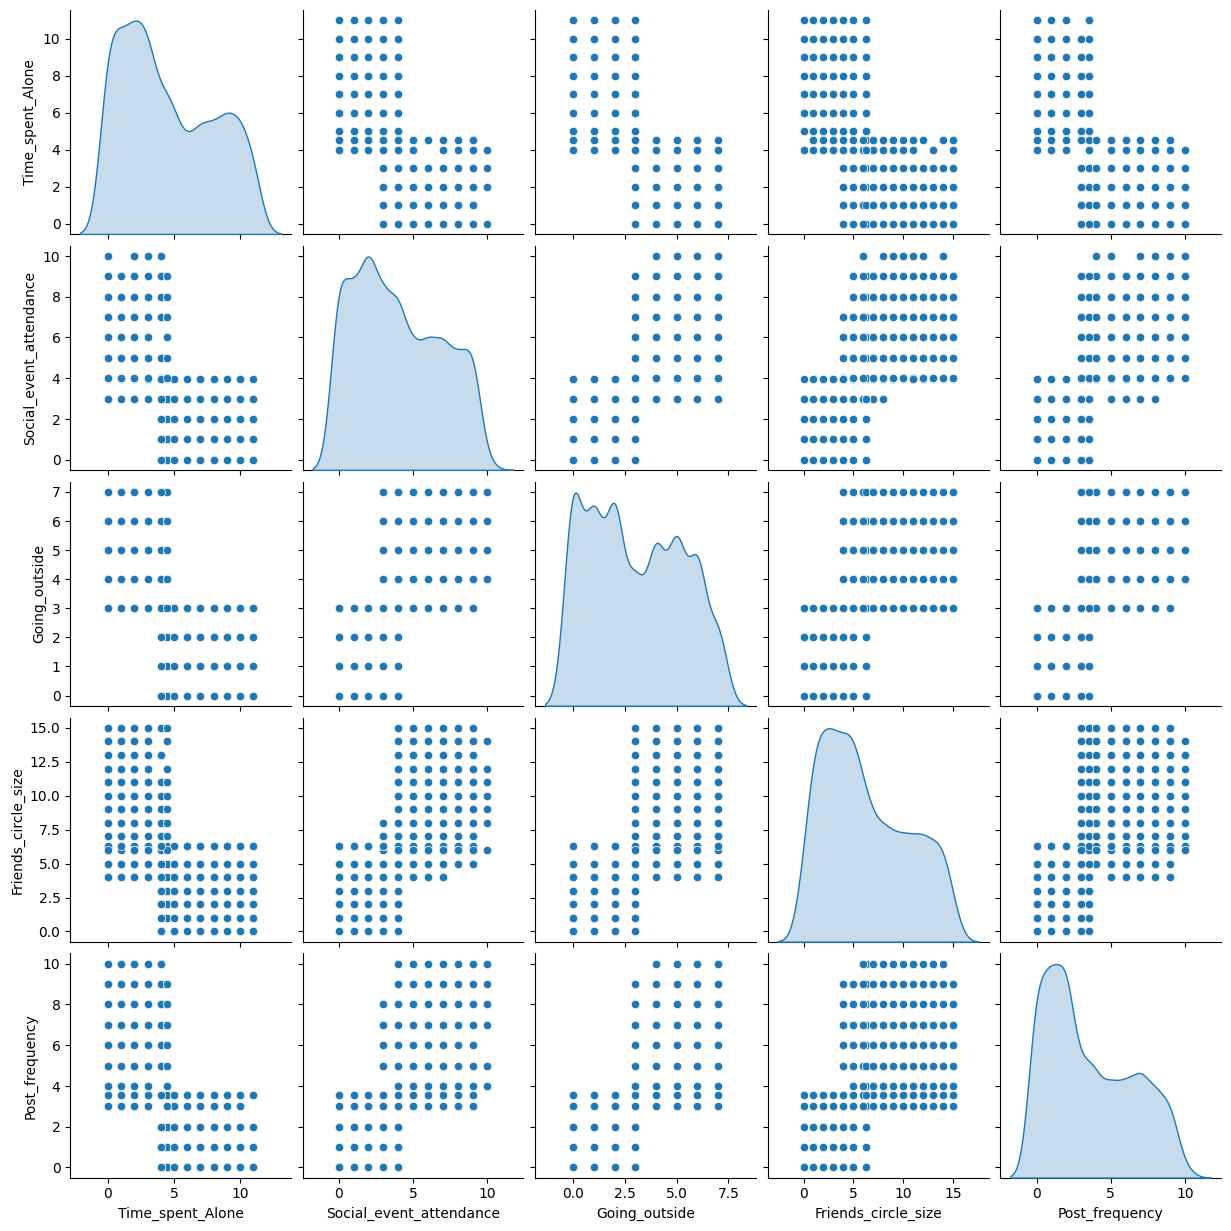

In [ ]:
sns.pairplot(df, diag_kind='kde')

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

### **Hapus Missing Value**

In [7]:
test = test.dropna()
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2477 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2477 non-null   float64
 1   Stage_fear                 2477 non-null   object 
 2   Social_event_attendance    2477 non-null   float64
 3   Going_outside              2477 non-null   float64
 4   Drained_after_socializing  2477 non-null   object 
 5   Friends_circle_size        2477 non-null   float64
 6   Post_frequency             2477 non-null   float64
 7   Personality                2477 non-null   object 
dtypes: float64(5), object(3)
memory usage: 174.2+ KB


### **Hapus Duplicate Value**

In [8]:
df = df.drop_duplicates()
test = df.drop_duplicates()
print(df.duplicated().sum())
print(test.duplicated().sum())

0
0


### LabelEncoder

In [9]:
label = LabelEncoder()
df['Personality'] = label.fit_transform(df['Personality'])
test['Personality'] = label.fit_transform(test['Personality'])
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,0
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,1
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,1
3,0.0,No,6.0,7.0,No,14.0,8.0,0
4,3.0,No,9.0,4.0,No,8.0,5.0,0


### **Pipeline Processing**

In [10]:
    # pipeline masing - masing tipe
onehot_transform = Pipeline([
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])


scaler_transform = Pipeline([
        ('scaler', StandardScaler())
    ])

prerocessing = ColumnTransformer([
        ('num', scaler_transform, num),
        ('onehot', onehot_transform, cat),
    ])

In [11]:
transform_data = prerocessing.fit_transform(df)
transform_data_test = prerocessing.fit_transform(test)

### **Gabungi Kolom**

In [12]:
encod_colom = prerocessing.named_transformers_['onehot']['encoder'].get_feature_names_out(cat)

In [13]:
all_columns = num + list(encod_colom)
preprocess_df = pd.DataFrame(transform_data, columns=all_columns)
preprocess_df[target] = df[target].values

In [14]:
all_columns = num + list(encod_colom)
preprocess_test = pd.DataFrame(transform_data, columns=all_columns)
preprocess_test[target] = test[target].values

In [15]:
preprocess_df.head()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear_No,Stage_fear_Yes,Drained_after_socializing_No,Drained_after_socializing_Yes,Personality
0,-0.068154,-0.069897,1.265368,1.508193,0.406606,1.0,0.0,1.0,0.0,0
1,1.399866,-1.461817,-1.439329,-1.545842,-0.279813,0.0,1.0,0.0,1.0,1
2,1.399866,-1.113837,-0.537763,-0.371213,-0.623023,0.0,1.0,0.0,1.0,1
3,-1.242570,0.626062,1.716151,1.743119,1.436236,1.0,0.0,1.0,0.0,0
4,-0.361758,1.670001,0.363802,0.333564,0.406606,1.0,0.0,1.0,0.0,0


In [16]:
path_train = "/content/personality_train(eksperimen ipynb).csv"
path_test = "/content/personality_test(eksperimen ipynb).csv"

### **Simpan Format CSV**

In [17]:
preprocess_df.to_csv(path_train, index=False)
preprocess_test.to_csv(path_test, index=False)

In [18]:
preprocess_df

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear_No,Stage_fear_Yes,Drained_after_socializing_No,Drained_after_socializing_Yes,Personality
0,-0.068154,-0.069897,1.265368,1.508193,0.406606,1.0,0.0,1.0,0.0,0
1,1.399866,-1.461817,-1.439329,-1.545842,-0.279813,0.0,1.0,0.0,1.0,1
2,1.399866,-1.113837,-0.537763,-0.371213,-0.623023,0.0,1.0,0.0,1.0,1
3,-1.242570,0.626062,1.716151,1.743119,1.436236,1.0,0.0,1.0,0.0,0
4,-0.361758,1.670001,0.363802,0.333564,0.406606,1.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
2493,-1.242570,1.670001,-0.086981,1.273267,-0.085994,1.0,0.0,1.0,0.0,0
2494,-0.361758,1.322022,-0.086981,1.743119,1.779445,1.0,0.0,1.0,0.0,0
2495,-0.068154,-1.113837,-0.988546,-0.606139,-1.309442,0.0,1.0,0.0,1.0,1
2496,1.987074,-1.113837,-0.086981,-1.075991,-1.309442,0.0,1.0,0.0,1.0,1


In [19]:
preprocess_test

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear_No,Stage_fear_Yes,Drained_after_socializing_No,Drained_after_socializing_Yes,Personality
0,-0.068154,-0.069897,1.265368,1.508193,0.406606,1.0,0.0,1.0,0.0,0
1,1.399866,-1.461817,-1.439329,-1.545842,-0.279813,0.0,1.0,0.0,1.0,1
2,1.399866,-1.113837,-0.537763,-0.371213,-0.623023,0.0,1.0,0.0,1.0,1
3,-1.242570,0.626062,1.716151,1.743119,1.436236,1.0,0.0,1.0,0.0,0
4,-0.361758,1.670001,0.363802,0.333564,0.406606,1.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
2493,-1.242570,1.670001,-0.086981,1.273267,-0.085994,1.0,0.0,1.0,0.0,0
2494,-0.361758,1.322022,-0.086981,1.743119,1.779445,1.0,0.0,1.0,0.0,0
2495,-0.068154,-1.113837,-0.988546,-0.606139,-1.309442,0.0,1.0,0.0,1.0,1
2496,1.987074,-1.113837,-0.086981,-1.075991,-1.309442,0.0,1.0,0.0,1.0,1


# ALUR PREPROCESSING
1. Menghapus missing value
2. Hapus duplicate value
3. Standarisasi
4. Ubah kolom kategorikal dgn onehotencoder
5. ubah kolom target jadi labelencoder